In [ ]:
!pip install pandas numpy seaborn scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online sales data set .csv to Online sales data set .csv


In [ ]:
df = pd.read_csv("Online sales data set .csv")

In [ ]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [ ]:
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\nDropped {initial_shape[0] - df.shape[0]} duplicate rows.")


Dropped 0 duplicate rows.


In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
invalid_dates = df['Date'].isnull().sum()
if invalid_dates > 0:
    print(f"\n{invalid_dates} rows have invalid dates and will be dropped.")
    df = df[df['Date'].notnull()]

In [ ]:
df.dropna(subset=['Units Sold', 'Unit Price', 'Total Revenue'], inplace=True)


In [ ]:
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')


In [ ]:
print("\nRemaining Missing Values After Conversion:")
print(df[['Units Sold', 'Unit Price', 'Total Revenue']].isnull().sum())


Remaining Missing Values After Conversion:
Units Sold       0
Unit Price       0
Total Revenue    0
dtype: int64


In [ ]:
Q1 = df['Total Revenue'].quantile(0.25)
Q3 = df['Total Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR



In [ ]:
df = df[(df['Total Revenue'] >= lower_bound) & (df['Total Revenue'] <= upper_bound)]
print(f"\nData shape after outlier removal: {df.shape}")


Data shape after outlier removal: (221, 9)


In [ ]:
numerical_cols = ['Units Sold', 'Unit Price', 'Total Revenue']
desc_stats = df[numerical_cols].describe().T

In [ ]:
for col in numerical_cols:
    desc_stats.loc[col, 'mode'] = df[col].mode()[0]
    desc_stats.loc[col, 'skewness'] = df[col].skew()
    desc_stats.loc[col, 'kurtosis'] = df[col].kurt()


print("===== Descriptive Statistics =====")
print(desc_stats)

===== Descriptive Statistics =====
               count        mean         std  min    25%     50%     75%  \
Units Sold     221.0    2.208145    1.352481  1.0   1.00    2.00    3.00   
Unit Price     221.0  144.303665  172.139175  6.5  26.99   78.00  199.95   
Total Revenue  221.0  219.792443  205.165408  6.5  59.00  149.97  299.99   

                  max    mode  skewness  kurtosis  
Units Sold      10.00    1.00  1.562479  4.465623  
Unit Price     899.99   49.99  1.951915  4.070966  
Total Revenue  899.99  299.99  1.345966  1.374545  


In [ ]:
from scipy.stats import gmean, hmean

In [ ]:
print("\n===== UNIT 1: Central Tendency & Measures of Dispersion =====")
numerical_cols = ['Units Sold', 'Unit Price', 'Total Revenue']
for col in numerical_cols:
    data = df[col]
    print(f"\n--- {col} ---")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Mode: {data.mode().iloc[0]:.2f}")
    print(f"Standard Deviation: {data.std():.2f}")
    print(f"Geometric Mean: {gmean(data[data > 0]):.2f}")
    print(f"Harmonic Mean: {hmean(data[data > 0]):.2f}")
    print(f"Mean Deviation: {(data - data.mean()).abs().mean():.2f}")
    print(f"Range: {data.max() - data.min():.2f}")
    print(f"Variance: {data.var():.2f}")
    print(f"Q1 (25th percentile): {data.quantile(0.25):.2f}")
    print(f"Q3 (75th percentile): {data.quantile(0.75):.2f}")
    print(f"IQR: {data.quantile(0.75) - data.quantile(0.25):.2f}")
    print(f"Quartile Deviation: {(data.quantile(0.75) - data.quantile(0.25)) / 2:.2f}")
    print(f"Skewness: {data.skew():.2f}")
    print(f"Kurtosis: {data.kurt():.2f}")


===== UNIT 1: Central Tendency & Measures of Dispersion =====

--- Units Sold ---
Mean: 2.21
Median: 2.00
Mode: 1.00
Standard Deviation: 1.35
Geometric Mean: 1.87
Harmonic Mean: 1.61
Mean Deviation: 1.06
Range: 9.00
Variance: 1.83
Q1 (25th percentile): 1.00
Q3 (75th percentile): 3.00
IQR: 2.00
Quartile Deviation: 1.00
Skewness: 1.56
Kurtosis: 4.47

--- Unit Price ---
Mean: 144.30
Median: 78.00
Mode: 49.99
Standard Deviation: 172.14
Geometric Mean: 71.77
Harmonic Mean: 35.94
Mean Deviation: 127.27
Range: 893.49
Variance: 29631.90
Q1 (25th percentile): 26.99
Q3 (75th percentile): 199.95
IQR: 172.96
Quartile Deviation: 86.48
Skewness: 1.95
Kurtosis: 4.07

--- Total Revenue ---
Mean: 219.79
Median: 149.97
Mode: 299.99
Standard Deviation: 205.17
Geometric Mean: 134.18
Harmonic Mean: 71.55
Mean Deviation: 161.04
Range: 893.49
Variance: 42092.84
Q1 (25th percentile): 59.00
Q3 (75th percentile): 299.99
IQR: 240.99
Quartile Deviation: 120.50
Skewness: 1.35
Kurtosis: 1.37


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Ensure numerical columns
numerical_cols = ['Units Sold', 'Unit Price', 'Total Revenue']



In [ ]:
# Set plot style
sns.set(style="whitegrid")


([<matplotlib.axis.YTick at 0x7db5fef65410>,
 [Text(0, 20, '20'), Text(0, 100, '100')])

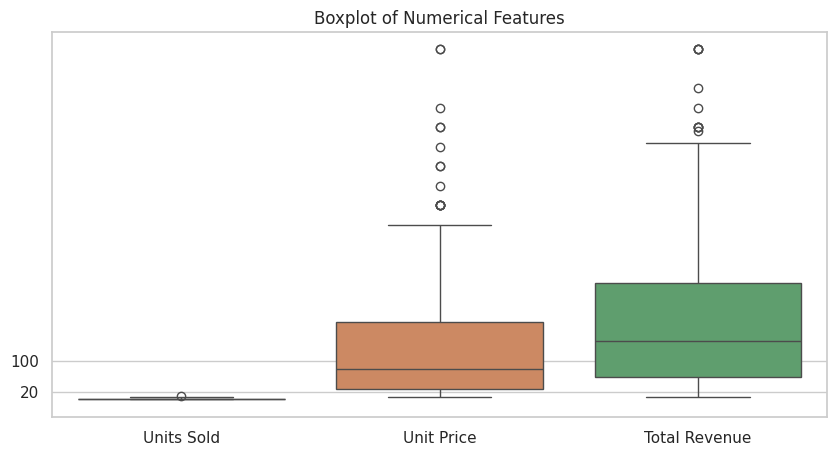

In [ ]:
# === 1. Boxplot for all numerical features ===
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.yticks([20,100])


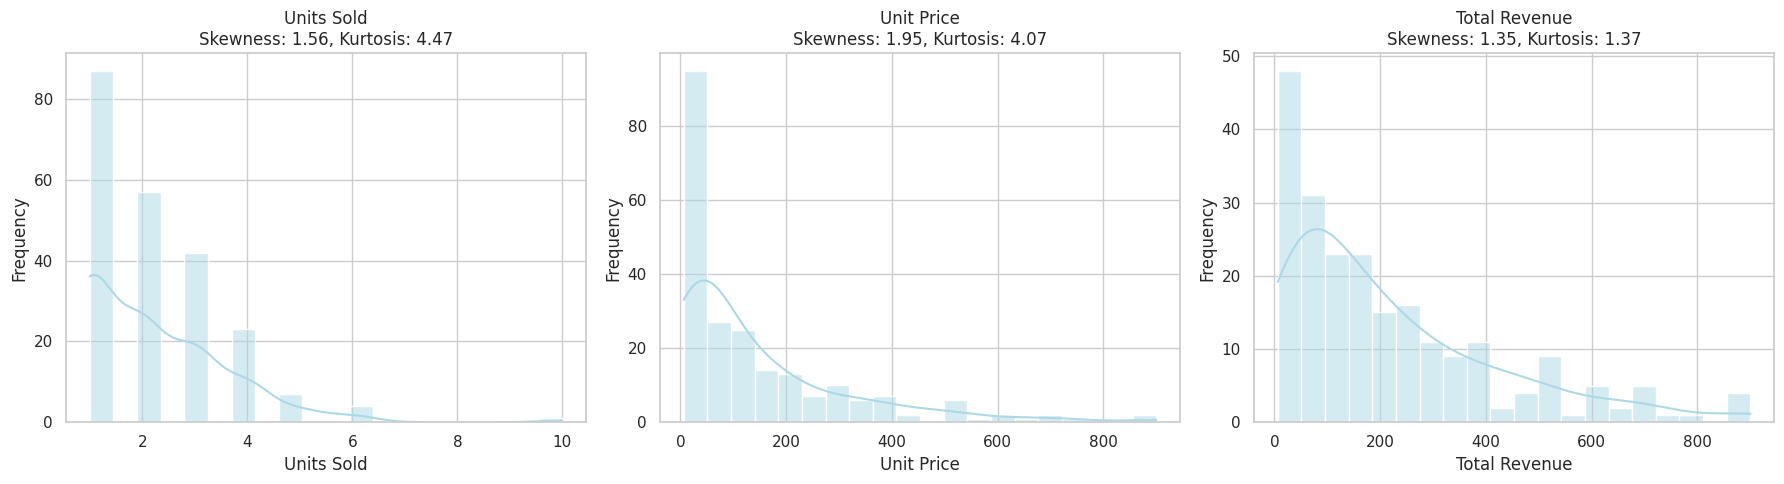

In [ ]:
# === 2. Histogram + KDE plots for each variable (to show skewness/kurtosis) ===
plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='lightblue')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr

In [ ]:
numerical_cols = ['Units Sold', 'Unit Price', 'Total Revenue']


In [ ]:
print("=== Covariance Matrix ===")
print(df[numerical_cols].cov())

=== Covariance Matrix ===
               Units Sold    Unit Price  Total Revenue
Units Sold       1.829206    -99.300266     -34.270375
Unit Price     -99.300266  29631.895532   29794.423390
Total Revenue  -34.270375  29794.423390   42092.844478


In [ ]:
print("\n=== Karl Pearson Correlation ===")
pearson_corr = df[numerical_cols].corr(method='pearson')
print(pearson_corr)


=== Karl Pearson Correlation ===
               Units Sold  Unit Price  Total Revenue
Units Sold       1.000000   -0.426520      -0.123505
Unit Price      -0.426520    1.000000       0.843628
Total Revenue   -0.123505    0.843628       1.000000


In [ ]:
print("\n=== Spearman Rank Correlation ===")
spearman_corr = df[numerical_cols].corr(method='spearman')
print(spearman_corr)


=== Spearman Rank Correlation ===
               Units Sold  Unit Price  Total Revenue
Units Sold       1.000000   -0.498959       -0.09408
Unit Price      -0.498959    1.000000        0.89991
Total Revenue   -0.094080    0.899910        1.00000


In [ ]:
x = df['Unit Price'].values.reshape(-1, 1)
y = df['Total Revenue'].values

In [ ]:
reg = LinearRegression().fit(x, y)
slope = reg.coef_[0]
intercept = reg.intercept_
r = pearsonr(df['Unit Price'], df['Total Revenue'])[0]

In [ ]:
theta_rad = np.arctan(slope)
theta_deg = np.degrees(theta_rad)

In [ ]:
print(f"\nRegression Equation: Revenue = {slope:.2f} * Unit Price + {intercept:.2f}")
print(f"Pearson Correlation (r): {r:.2f}")
print(f"Angle of Regression Line with X-axis: {theta_deg:.2f} degrees")


Regression Equation: Revenue = 1.01 * Unit Price + 74.70
Pearson Correlation (r): 0.84
Angle of Regression Line with X-axis: 45.16 degrees


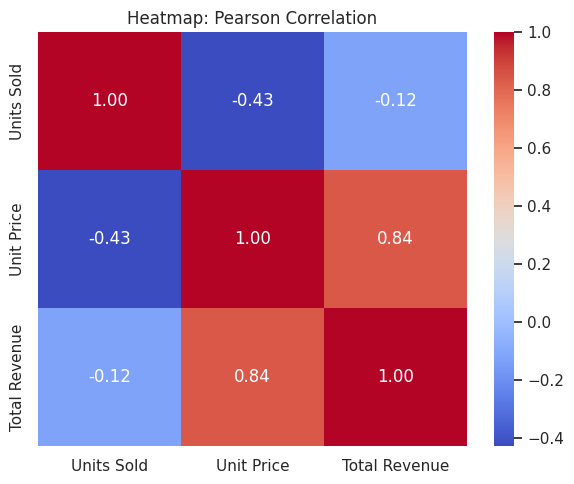

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap: Pearson Correlation")
plt.tight_layout()
plt.show()

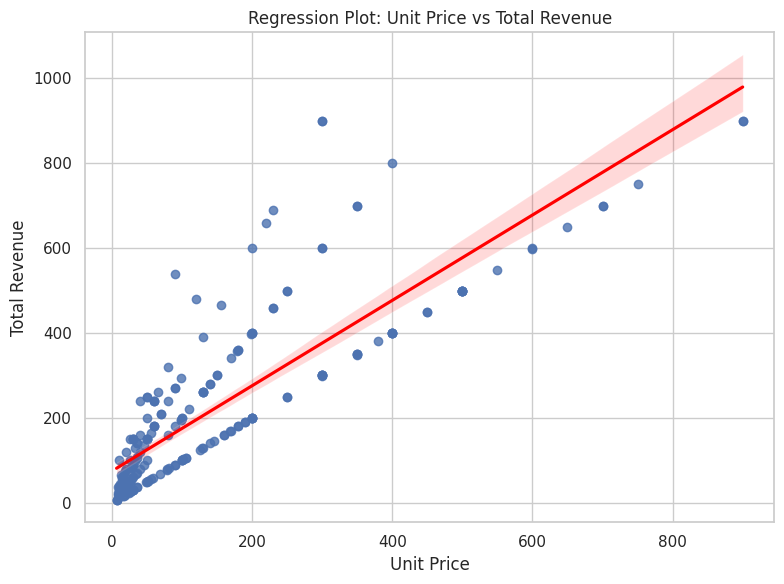

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Unit Price', y='Total Revenue', data=df, line_kws={'color': 'red'})
plt.title('Regression Plot: Unit Price vs Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample time series for monthly data (for simplicity)
monthly_data = df['Total Revenue'].resample('M').sum()
monthly_data = monthly_data.dropna()


/tmp/ipython-input-37-4004516760.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Total Revenue'].resample('M').sum()


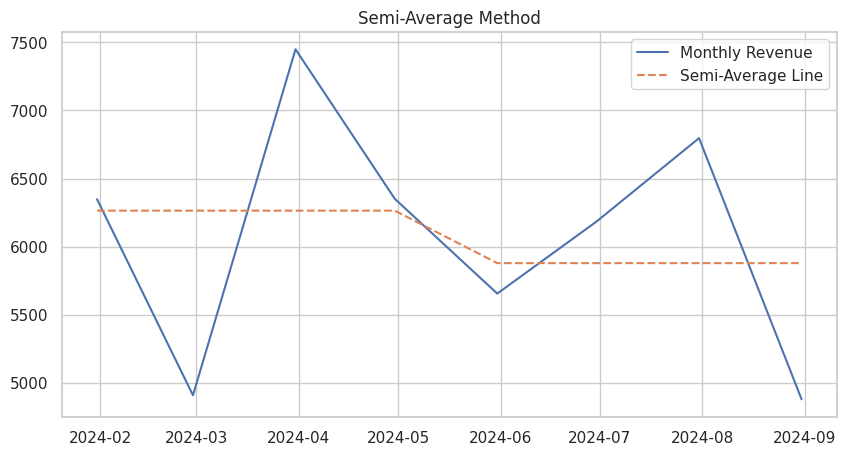

In [ ]:
n = len(monthly_data)
half = n // 2

first_half = monthly_data[:half]
second_half = monthly_data[half:]

semi_avg_line = pd.Series(index=monthly_data.index, dtype='float64')
semi_avg_line[:half] = first_half.mean()
semi_avg_line[half:] = second_half.mean()

# Plot Semi-Average
plt.figure(figsize=(10,5))
plt.plot(monthly_data, label='Monthly Revenue')
plt.plot(semi_avg_line, label='Semi-Average Line', linestyle='--')
plt.title('Semi-Average Method')
plt.legend()
plt.show()


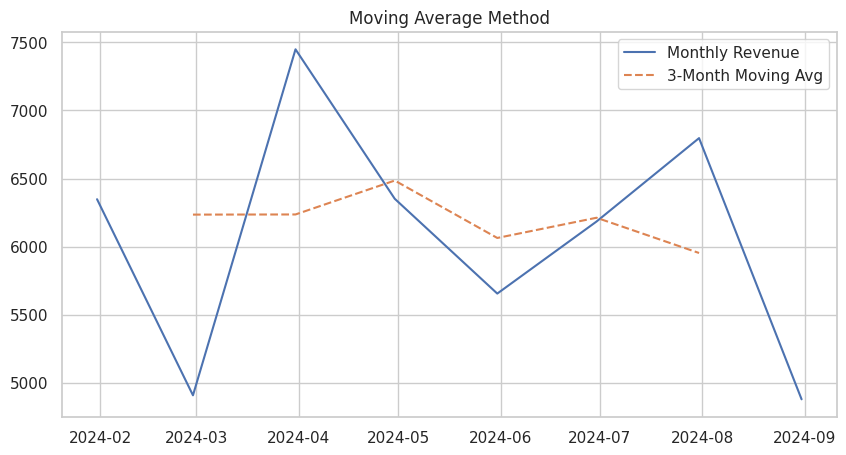

In [ ]:
ma_3 = monthly_data.rolling(window=3, center=True).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_data, label='Monthly Revenue')
plt.plot(ma_3, label='3-Month Moving Avg', linestyle='--')
plt.title('Moving Average Method')
plt.legend()
plt.show()


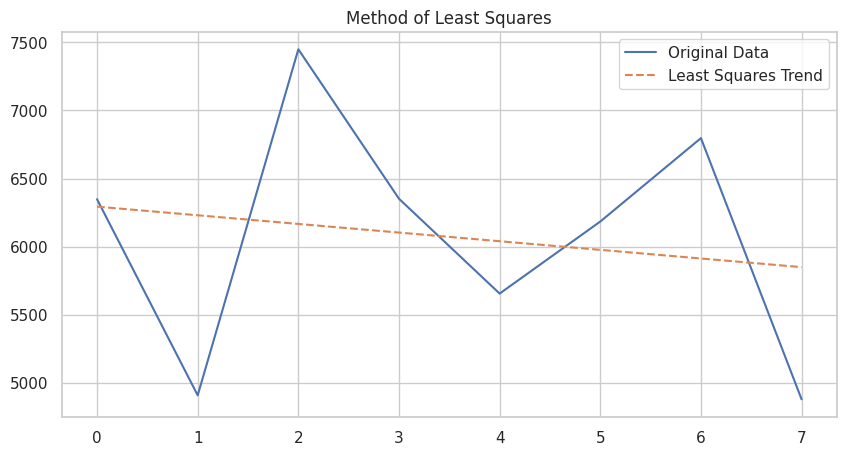

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.arange(len(monthly_data)).reshape(-1, 1)
y = monthly_data.values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
trend_line = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(monthly_data.values, label='Original Data')
plt.plot(trend_line, label='Least Squares Trend', linestyle='--')
plt.title('Method of Least Squares')
plt.legend()
plt.show()


/tmp/ipython-input-41-81204836.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = df['Total Revenue'].resample('Q').mean()


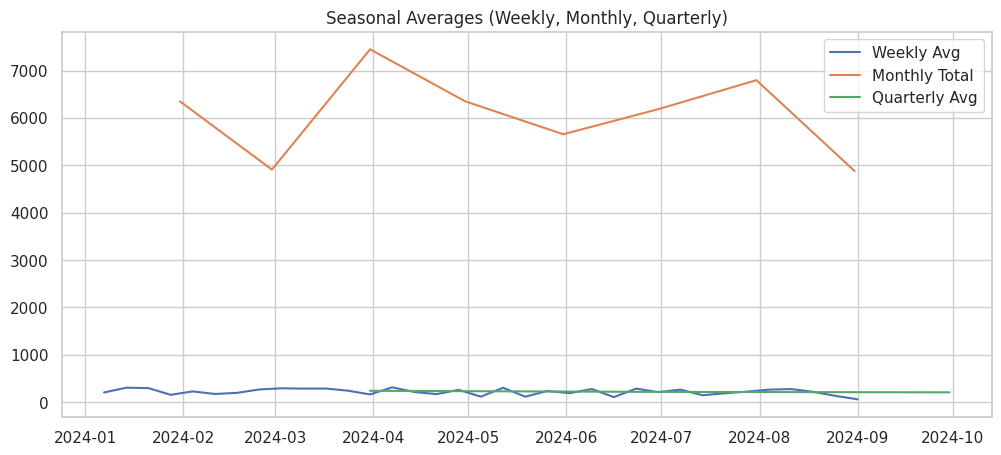

In [ ]:
# WEEKLY seasonal averages
weekly_avg = df['Total Revenue'].resample('W').mean()

# QUARTERLY seasonal averages
quarterly_avg = df['Total Revenue'].resample('Q').mean()

# Plot all
plt.figure(figsize=(12,5))
plt.plot(weekly_avg, label='Weekly Avg')
plt.plot(monthly_data, label='Monthly Total')
plt.plot(quarterly_avg, label='Quarterly Avg')
plt.title('Seasonal Averages (Weekly, Monthly, Quarterly)')
plt.legend()
plt.show()


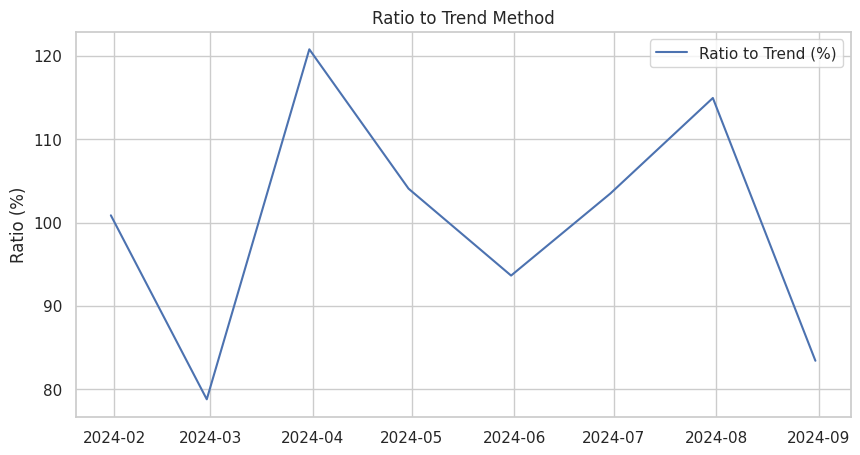

In [ ]:
# Use trend from least squares
trend_series = pd.Series(trend_line.flatten(), index=monthly_data.index)

# Ratio to trend
ratio_to_trend = monthly_data / trend_series * 100

plt.figure(figsize=(10,5))
plt.plot(ratio_to_trend, label='Ratio to Trend (%)')
plt.title('Ratio to Trend Method')
plt.ylabel('Ratio (%)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, kruskal, norm

# ---- 1. Prepare Data ----
asia = grouped['Asia']
europe = grouped['Europe']
north_america = grouped['North America']




/tmp/ipython-input-59-2047766209.py:25: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


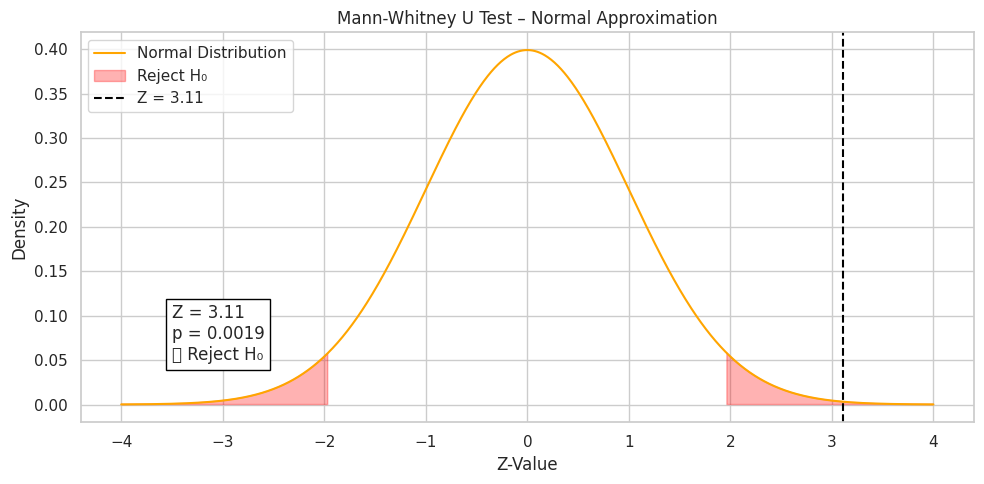

In [ ]:
u_stat, p_u = mannwhitneyu(asia, europe, alternative='two-sided')
n1, n2 = len(asia), len(europe)
mean_u = n1 * n2 / 2
std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
z_u = (u_stat - mean_u) / std_u

# Plot Function
def plot_normal_test(z_val, p_val, title):
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label='Normal Distribution', color='orange')
    plt.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='red', alpha=0.3, label='Reject H₀')
    plt.axvline(z_val, color='black', linestyle='--', label=f'Z = {z_val:.2f}')
    plt.text(-3.5, 0.05, f"Z = {z_val:.2f}\np = {p_val:.4f}\n" +
             ("🔴 Reject H₀" if p_val < 0.05 else "🟢 Accept H₀"),
             bbox=dict(facecolor='white', edgecolor='black'))

    plt.title(title)
    plt.xlabel("Z-Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for Mann-Whitney
plot_normal_test(z_u, p_u, "Mann-Whitney U Test – Normal Approximation")

/tmp/ipython-input-60-1238733692.py:22: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


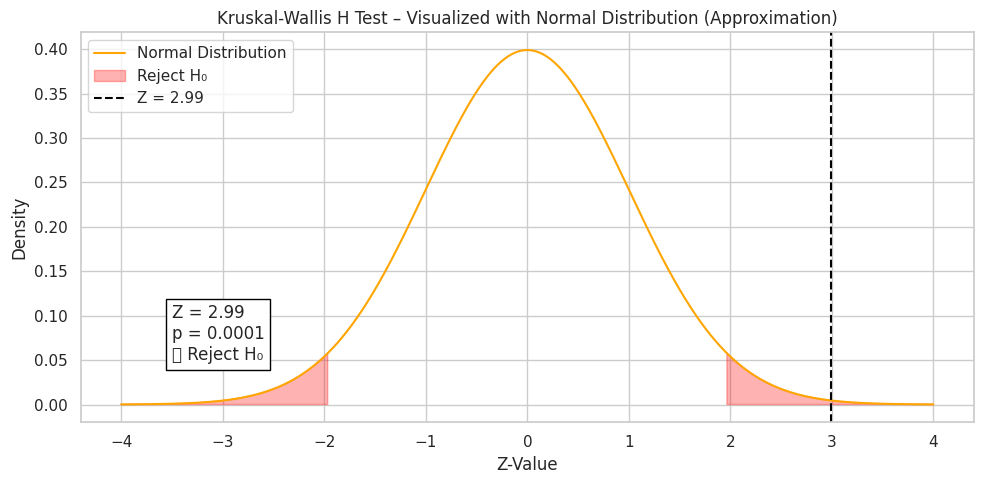

In [ ]:
h_stat, p_h = kruskal(asia, europe, north_america)
z_h = (h_stat - 0) / np.sqrt(2 * h_stat)  # Approximate Z-score for visualization

# Plot Function (can be reused)
def plot_normal_test(z_val, p_val, title):
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label='Normal Distribution', color='orange')
    plt.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='red', alpha=0.3, label='Reject H₀')
    plt.axvline(z_val, color='black', linestyle='--', label=f'Z = {z_val:.2f}')
    plt.text(-3.5, 0.05, f"Z = {z_val:.2f}\np = {p_val:.4f}\n" +
             ("🔴 Reject H₀" if p_val < 0.05 else "🟢 Accept H₀"),
             bbox=dict(facecolor='white', edgecolor='black'))

    plt.title(title)
    plt.xlabel("Z-Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for Kruskal-Wallis
plot_normal_test(z_h, p_h, "Kruskal-Wallis H Test – Visualized with Normal Distribution (Approximation)")